In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aks245/Assignment-Dataset/main/Assignment%207/crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# HC Clustering

In [6]:
df1= df

In [7]:
from sklearn.preprocessing import MinMaxScaler
sl = MinMaxScaler()
x= sl.fit_transform(df1)
df2=pd.DataFrame(x)
df2.columns=df1.columns
df2

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [8]:
from scipy.cluster import hierarchy

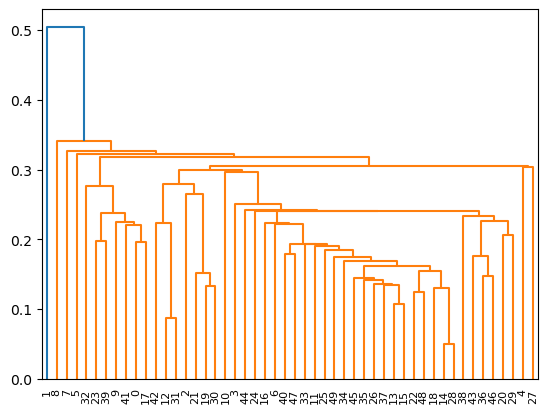

In [9]:
lk = hierarchy.linkage(df2)
dendrogram = hierarchy.dendrogram(lk)

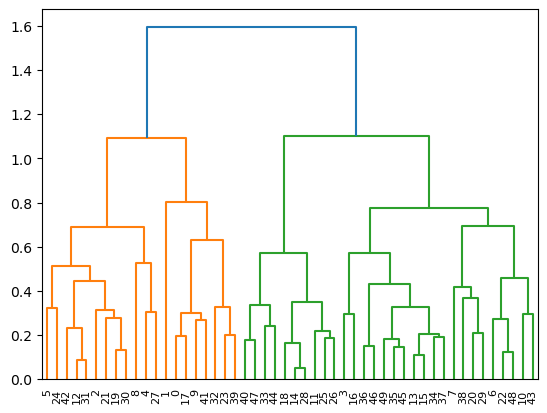

In [10]:
lk=hierarchy.linkage(df2, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc=AgglomerativeClustering(n_clusters=3)
y= hc.fit_predict(df2)

In [13]:
y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [14]:
df1['Cluster']=y
df1

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


# KMeans

In [15]:
df3=df

In [16]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(df3)
df4= pd.DataFrame(x)
df4.columns= df3.columns
df4

,Murder,Assault,UrbanPop,Rape,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,-1.071652
1,0.513019,1.118060,-1.224067,2.509424,-1.071652
2,0.072361,1.493817,1.009122,1.053466,-1.071652
3,0.234708,0.233212,-1.084492,-0.186794,0.204124
4,0.281093,1.275635,1.776781,2.088814,-1.071652
5,0.025976,0.402909,0.869548,1.883901,-1.071652
6,-1.040880,-0.736484,0.799761,-1.092723,0.204124
7,-0.437875,0.815030,0.450825,-0.585834,0.204124
8,1.765415,1.990786,1.009122,1.150530,-1.071652
9,2.229265,0.487757,-0.386621,0.492653,-1.071652


In [17]:
from sklearn.cluster import KMeans
from scipy .spatial.distance import cdist
import warnings
warnings.filterwarnings ('ignore')

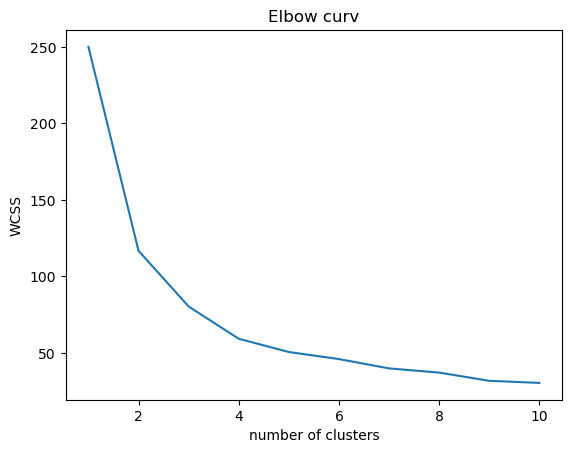

In [18]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
model=KMeans(n_clusters=4)
model.fit(df1)
model.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [20]:
df3['Cluster']= model.labels_
df3

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,2


In [21]:
df3.groupby(df4.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
-1.071652,12.165000,255.250000,68.400000,29.165000,0.500000
0.204124,6.055556,140.055556,71.333333,18.683333,1.555556
1.479900,3.091667,76.000000,52.083333,11.833333,2.500000


# DBSCAN

In [22]:
df3.drop(columns=['Cluster'], inplace=True)
df3.head(1)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [25]:
df4.drop(columns=['Cluster'], inplace=True)

In [27]:
df4.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [31]:
x=df4.values
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [40]:
dbscan=DBSCAN(eps=1,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1)

In [41]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [42]:
cl=pd.DataFrame(dbscan.labels_, columns=['Cluster'])
cl

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [43]:
df5= pd.concat([df3,cl], axis=1)
df5

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [44]:
df5.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,11.152174,236.913043,66.739130,27.034783
0,4.904167,108.625000,61.708333,16.516667
1,5.066667,160.666667,87.000000,14.466667
